In [2]:
import numpy as np

# Q1:Solve diagonal linear system !(10pt)

## Note:pseducode 中陣列的index從1開始，python從0開始，注意區分！！!

## Algorithm of diagonal_v2:   
    given A, b     
    for i = 1 . . . n    
        x_i = b_i / a_i,i    
    end

## step 1:given A,b:
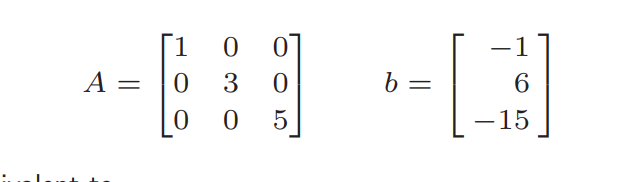

In [2]:
v =np.array( [1, 3, 5])
D = np.diag(v)
b =np.array([-1,6,-15],)
x=np.zeros(3,dtype=int)
v=np.diag(D)
v

array([1, 3, 5])

## step 2_v1:by for 迴圈  
Output: x= [-1  2 -3]   
Note:The type of x'output must be int!

In [3]:
m,n=D.shape
for i in range (0,n):
    x[i]=b[i]/D[i,i]
print('x=',x.astype(int))

x= [-1  2 -3]


## step 2_v2:by vector compute  
## x=b/diag(A)     
Output: x= [-1  2 -3]   
Note:The type of x'output must be int!

In [4]:
x=b/(np.diag(D))

print('x=',x.astype(int))

x= [-1  2 -3]


# A=LU    
## 提取upper triangular matrix and lower triangular matrix method

In [4]:
A = np.arange(1, 10).reshape(3, 3)
A[0:3,1]

array([2, 5, 8])

In [6]:
U_diag = np.triu(A, k=0)
U_diag

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

In [7]:
U_no_diag = np.triu(A, k=1)
U_no_diag

array([[0, 2, 3],
       [0, 0, 6],
       [0, 0, 0]])

In [8]:
L_diag = np.tril(A, k=0)
L_diag

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

In [9]:
L_no_diag=np.tril(A,k=-1)
L_no_diag

array([[0, 0, 0],
       [4, 0, 0],
       [7, 8, 0]])

# Q2:Triangular Systems-upper triangular system method !(20 pt)
## Backward substitution :

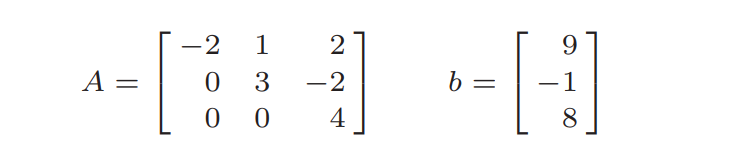  
Output: x= [-2  1  2]

## Algorithm of backward substitution  
    given U, b  
    
    x_n = b_n/u_nn  
    for i = n − 1 . . . 1  
        s = b_i  
        for j = i + 1 . . . n  
            s = s − u_i,j *x_j
        end
    x_i = s/u_i,i
    end  

In [10]:
U=np.array([-2, 1, 2, 0, 3, -2, 0, 0, 4])
U=U.reshape(3,3)
b=np.array([9,-1,8])
m,n=U.shape
x=np.zeros(n,dtype=int)
x[n-1]=b[n-1]/U[n-1,n-1]
for i in range(n-2,-1,-1):
    x[i]=(b[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i];
print('x=',x)
#用向量計算能少用一個for迴圈。

x= [-2  1  2]


# Q3:Triangular Systems-Lower triangular system method!(20pt)  
## Forward substitution :

# A=
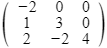  
# b=
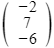
Output: x= [ 1  2 -1]

## Algorithm of forward substitution  
    given L, b  
    x_1 = b_1/ℓ_11  
    for i = 2 . . . n  
        s = b_i  
        for j = 1 . . . i − 1    
            s = s − ℓ_i,j * x_j  
        end  
    xi = s/ℓ_i,i  
    end

In [11]:
L=np.array([-2, 0, 0, 1, 3, 0, 2, -2, 4])
L=L.reshape(3,3)
b=np.array([-2,7,-6])
m,n=L.shape
x=np.zeros(n,dtype=int)
x[0]=b[0]/L[0,0]
for i in range(1,n,1):
    x[i]=(b[i]-L[i,i+1:n].dot(x[i+1:n]))/L[i,i];
print('x=',x)

x= [ 1  2 -1]


# Q4: Guassion Elimination method to solve linear system !(30pt)  
## Ax=b,for x!


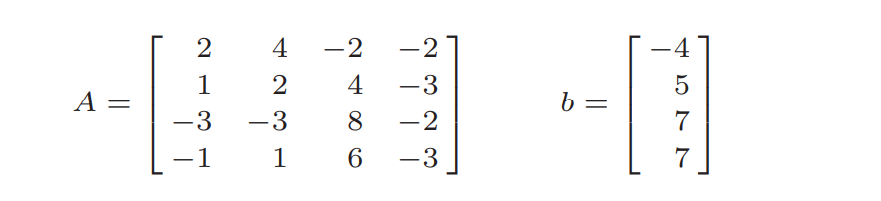

## Algorithm for guassion elimination
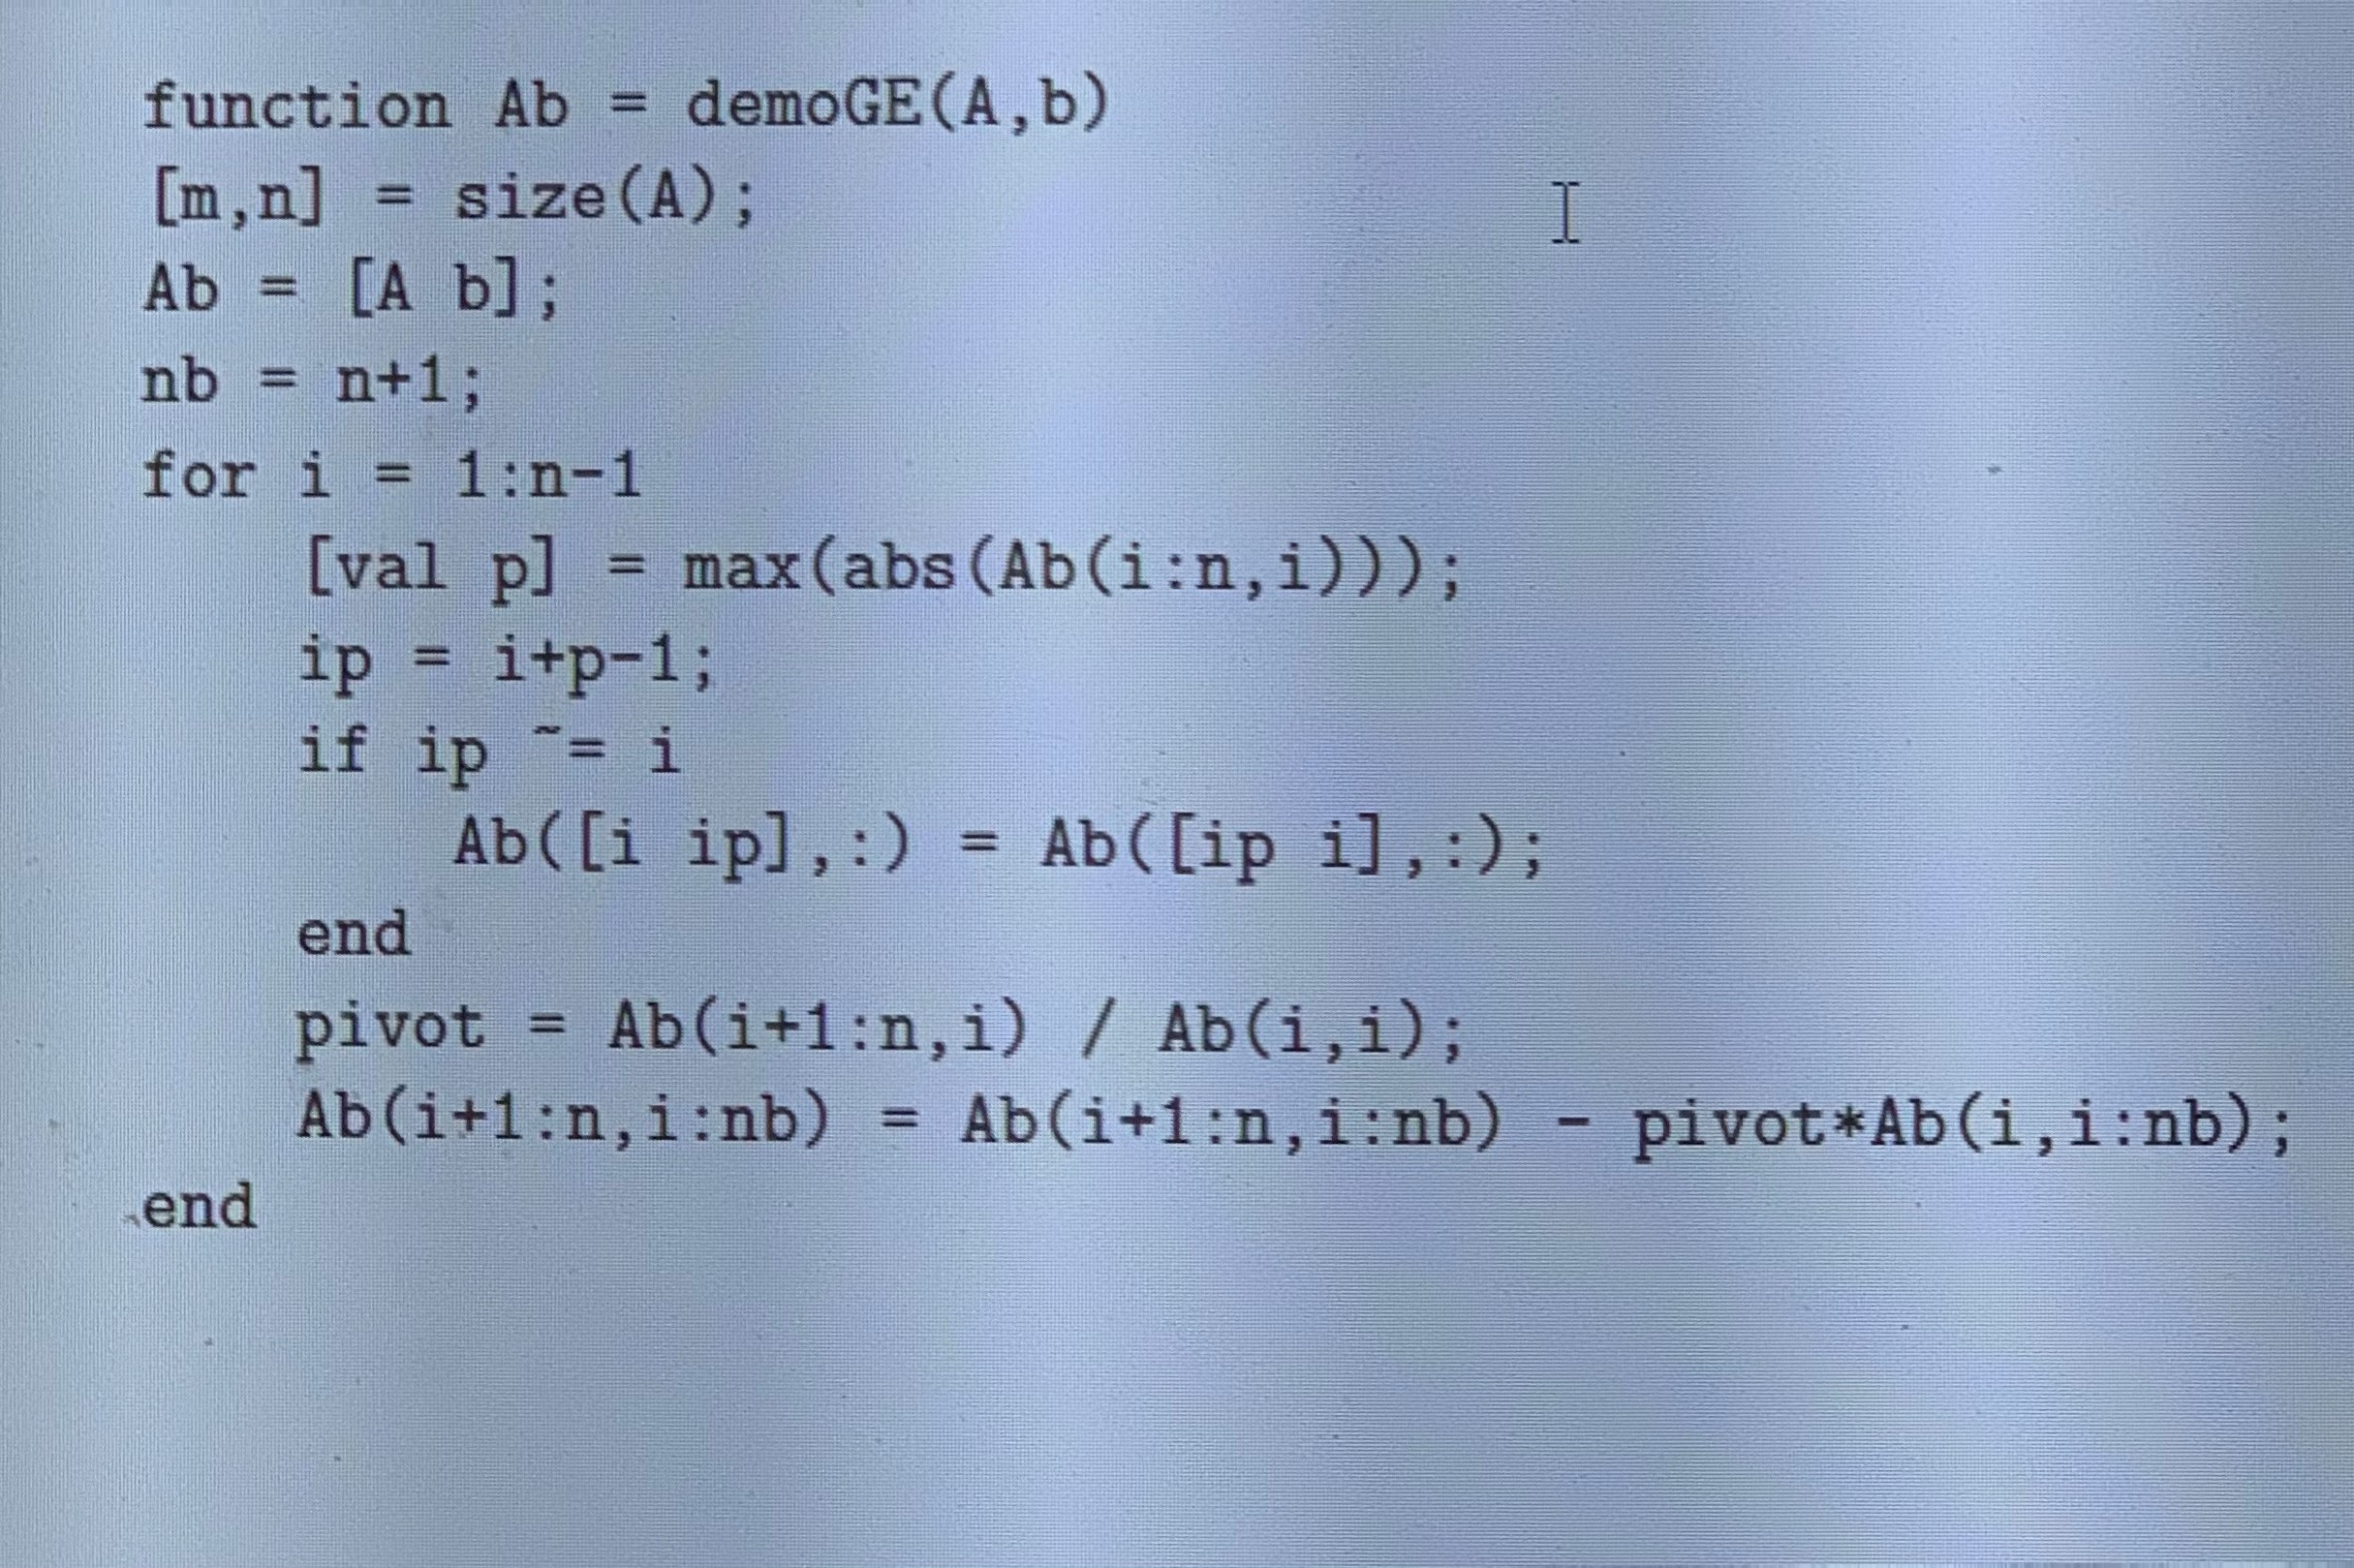

## step1: guassion elimination to upper triangular matrix

In [13]:
#A=np.array([2, 4, -2, -2, 1, 2, 4, -3, -3, -3, 8, -2, -1, 1, 6, -3])
A=np.array([-3,2,-1,6,-6,7,3,-4,4])
A=A.reshape(3,3)
m,n=A.shape
#b=np.array([-4,5,7,7])
#b=b.reshape(4,1)
b=np.array([-1,-7,-6])
b=b.reshape(3,1)
Ab=np.concatenate((A,b),axis=1)
nb=n+1
for i in range (0,n-1):
    
    for j in range( i,n-1):
        index=i;
        if Ab[j,i]<Ab[j+1,i]:
            index=j+1;
    ip=index;
    if ip!= i:
        Ab[[i,ip],:]=Ab[[ip,i],:];
    pivot=Ab[i+1:n,i]/Ab[i,i];
    pivot=pivot.reshape(n-i-1,1)
    X=Ab[i,i:nb]
    X=X.reshape(1,nb-i)
    Ab[i+1:n,i:nb]=Ab[i+1:n,i:nb]-pivot.dot(X);

print(Ab)
        

[[-3  2 -1 -1]
 [ 0 -2  5 -9]
 [ 0  0 -2  2]]


## step2: Backward method to solve Ab!

In [14]:
A=Ab[0:m,0:n]
b=Ab[:,nb-1]
print(A)
print(b)
m,n=A.shape
x=np.zeros(n,dtype=int)
x[n-1]=b[n-1]/A[n-1,n-1]
for i in range(n-2,-1,-1):
    x[i]=(b[i]-A[i,i+1:n].dot(x[i+1:n]))/A[i,i];
print('x=',x)

[[-3  2 -1]
 [ 0 -2  5]
 [ 0  0 -2]]
[-1 -9  2]
x= [ 2  2 -1]
